In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

# Loading the data

In [2]:
df = pd.Series()
df['raw'] = pd.read_csv('./Data/Annual_Parking_Study_Data.csv')
df['raw'].shape


/home/bok/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(95218, 24)

In [3]:
df['raw'].iloc[0]

Elmntkey                                                            1577
Study_Area                                            12th Ave - Weekday
Sub_Area                                                             NaN
Study Date                                                      4/8/2014
Study_Time                                                       2:00 PM
Side                                                                   W
Unitdesc                  12TH AVE BETWEEN E COLUMBIA ST AND E MARION ST
Parking_Category                                            Paid Parking
Peak Hour_SDOT                                                       NaN
Parking_Spaces                                                         8
Total_Vehicle_Count                                                    9
Dp_Count                                                               7
Rpz_Count                                                            NaN
TG_Car2Go                                          

# Data cleaning

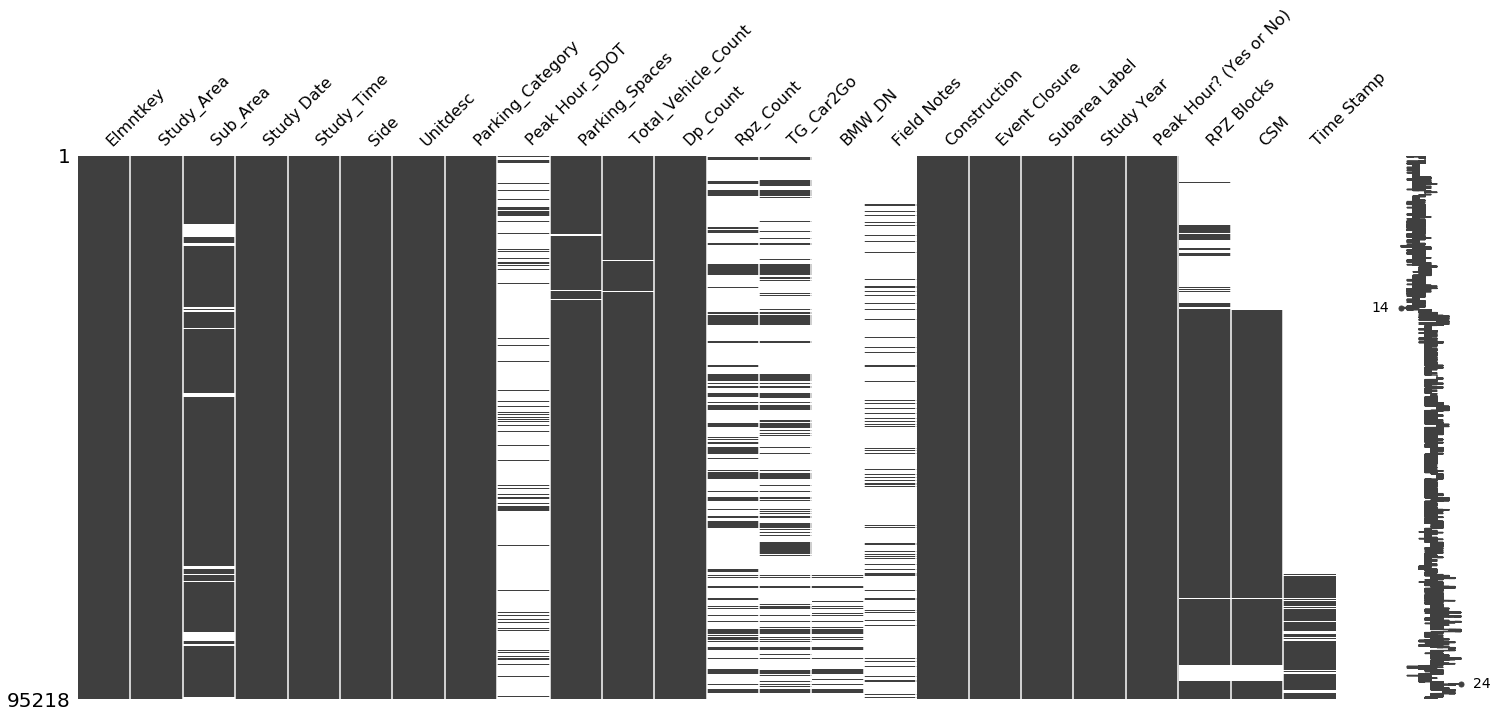

In [4]:
msno.matrix(df['raw'])

In [5]:
NA = df['raw'].shape[0] - df['raw'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['raw'].shape[0]))

Amount of lines containing N/A:		95108
Percent of lines containing N/A:	99.88%


There are some columns, which mostly contains missing values. Thees identify as Peak_Hour_SDOT, RPZ_Count, TG_Car2Go, BMW_DN, Field Notes and Time Stamp. Further more it is worth investegating the columns Sub_Area, RPZ_Blocks and CSM.

## Time stamp investegation
Time stamp has alot of missing values. It would be interesting to see, if timestamps has a relation with the study_Time, Study Date and Study Year columns.

In [6]:
NA = df['raw']['Time Stamp'].shape[0] - df['raw']['Time Stamp'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['raw'].shape[0]))

Amount of lines containing N/A:		76340
Percent of lines containing N/A:	80.17%


In [ ]:
df['raw'][df['raw']['Time Stamp'].notnull()].head()[['Time Stamp','Study_Time','Study Date','Study Year']]

,Time Stamp,Study_Time,Study Date,Study Year
36373,0.894028,9:00 PM,5/24/2016,2016
72494,0.754861,6:00 PM,4/5/2016,2016
72647,0.793750,7:00 PM,4/5/2016,2016
72973,0.877778,9:00 PM,4/5/2016,2016
73339,0.638194,3:00 PM,4/5/2016,2016


The time stamp seem to be of a different type than date time. As no information is provided as to what format the timestamp values have, and the column is 80% missing values, a new timestamp will be created from study time and study date columns. This new timestamp column will be used as index

In [ ]:
df['fixed'] = df['raw'].drop('Time Stamp',axis=1)
df['fixed']['Time stamp'] = pd.to_datetime(df['raw']['Study_Time'] + ' ' + df['raw']['Study Date'])
df['fixed'] = df['fixed'].drop(['Study_Time','Study Date','Study Year'],axis=1)
df['fixed'] = df['fixed'].set_index('Time stamp')
df['fixed'].sort_index(inplace=True)

In [ ]:
df['fixed'] = df['raw'].drop('Time Stamp',axis=1)
df['fixed']['Time stamp'] = pd.to_datetime(df['raw']['Study_Time'] + ' ' + df['raw']['Study Date'])
df['fixed'] = df['fixed'].drop(['Study_Time','Study Date','Study Year'],axis=1)
df['fixed'] = df['fixed'].set_index('Time stamp')
df['fixed'].sort_index(inplace=True)

In [ ]:
df['fixed'].head()

Now the data is sorted by date, and the 2 columns Study_Time and Study Date has been removed.
It makes sense to make a new missing value matrix, to get a better understanding of the missing values versus time.

In [ ]:
msno.matrix(df['fixed'])

In [ ]:
NA = df['fixed'].shape[0] - df['fixed'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['raw'].shape[0]))

The data has been slighty rearanged when sorting by the new timestamp column.
The amount of missing value rows has not changed at this point.

## Exploration of the unknown columns
Before making a decision, it would be usefull to investegate what data associated with each of the columns.  
The data did not come with a description, which means we will have to look at the data and try to interpret meaning and usefullness for our case.

In [ ]:
# clumns names to drop. Column names will be added after evaluation of each.
dropList = []

### Peak Hour_SDOT

In [ ]:
NA = df['fixed']['Peak Hour_SDOT'].shape[0] - df['fixed']['Peak Hour_SDOT'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['fixed'].shape[0]))
df['fixed']['Peak Hour_SDOT'].value_counts().head(10)

This column seem to provide information, as to the busiest hours for the area. This is a very interesting column, but because nearly 90% of the data is missing, we choose to remove this column from the main dataset.   
A dataset with peakhours will also be made, after the cleaning, to explore the possibility to predict the mising values. It is noted, that a binary "is peak hour" column also exists, which could be used to generate the peak hours category.

In [ ]:
dropList.append('Peak Hour_SDOT')

### TG_Car2Go

In [ ]:
NA = df['fixed']['TG_Car2Go'].shape[0] - df['fixed']['TG_Car2Go'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['fixed'].shape[0]))
df['fixed']['TG_Car2Go'].value_counts().head(10)

Car 2 go is a car sharing service. This is not relevant for our use, and furthermore the columns does not seem to be interpreted.  
This column is marked as a drop column, with no second thoughts.

In [ ]:
dropList.append('TG_Car2Go')

### BMW_DN

In [ ]:
NA = df['fixed']['BMW_DN'].shape[0] - df['fixed']['BMW_DN'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['raw'].shape[0]))
df['fixed']['BMW_DN'].value_counts().head(10)

This column only has 5 different values. As we are unable to interpret what it means, this column is also marked for drop.

In [ ]:
dropList.append('BMW_DN')

### Rpz_Count and RPZ Blocks
It is assumed that RPZ has the same meaning in this context. It makes sense to investegate the two RPZ columns together.

In [ ]:
NA = df['fixed']['Rpz_Count'].shape[0] - df['fixed']['Rpz_Count'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['fixed'].shape[0]))
df['fixed']['Rpz_Count'].value_counts().head(10)

In [ ]:
NA = df['fixed']['RPZ Blocks'].shape[0] - df['fixed']['RPZ Blocks'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['fixed'].shape[0]))
df['fixed']['RPZ Blocks'].value_counts().head(10)

RPZ only has one solid lead, this is the value "Restricted Parking Zone", found in the blocks column. This could indicate this is a form of "parking ticket" column. Our focus is only on legal means of parking, and therefore the RPZ columns is added to the drop list.

In [ ]:
dropList.append('Rpz_Count')
dropList.append('RPZ Blocks')

### CSM

In [ ]:
NA = df['fixed']['CSM'].shape[0] - df['fixed']['CSM'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['fixed'].shape[0]))
df['fixed']['CSM'].value_counts().head(10)

This column has something to do with the parking zone. The biggest part of the data is marked Y and the second largest part is marked N. As there is no clue as to what is being asked, the column is also marked for drop.

In [ ]:
dropList.append('CSM')

### Field notes
This field is suspected to hold notes taken by the observer. To confirm this, the first few notes will be investegated.

In [ ]:
NA = df['fixed']['Field Notes'].shape[0] - df['fixed']['Field Notes'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['fixed'].shape[0]))
df['fixed']['Field Notes'].dropna().head(10)

As suspected, this is notes for the observation. This is not usefull information for us, and is marked for drop.

In [ ]:
dropList.append('Field Notes')

## Cleaning
Now the columns has been marked for drop, a clean version of the dataset can be made.

In [ ]:
df['clean'] = df['fixed'].drop(dropList,axis=1) 

In [ ]:
msno.matrix(df['clean'])

In [ ]:
NA = df['clean'].shape[0] - df['clean'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['clean'].shape[0]))

### Sub Area
For now, sub area is kept. This is only for consideration.

In [ ]:
df['clean']['Parking_Category'].value_counts()

In [ ]:
df['clean']['Sub_Area'].value_counts()

In [ ]:
df['clean']['Subarea Label'].value_counts().head()

The Subarea Label column, has a paranteses holding all the missing information about the subarea.
I will try to extract that information.

In [ ]:
df['clean']['Subarea Label'].str.split('(').str[1].value_counts()

In [ ]:
# dictionary
di = {'North Subarea)': "North",
      'Paid Subarea)': "Paid",
      'Core Subarea)' : 'Core', 
      'Unpaid Subarea)' : 'Unpaid', 
      'Edge Subarea)' : 'Edge', 
      'South Subarea)' : 'South',
      'Periphery Subarea)' : 'Periphery', 
      'Retail Subarea)' : 'Retail', 
      '2 Hour Subarea)' : '2-hour',
      '10 Hour Subarea)' : '10-hour',
      'Financial Subarea)' : 'Financecial',
      'Waterfront Subarea)' : 'Waterfront',
      'NorthWest Subarea)' : 'NorthWest',
      '0 Subarea)' : '0',
      '4 Hour Subarea)' : '4-hour',
      '  Subarea)' : 'unknown'}

In [ ]:
# applying dictionary
df['clean']['Sub_Area'] = df['clean']['Subarea Label'].str.split('(').str[1].replace(di,)

# replacing left overs with unknown
df['clean']['Sub_Area'] = df['clean']['Sub_Area'].replace(np.nan,'unknown')

In [ ]:
NA = df['clean'].shape[0] - df['clean'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['clean'].shape[0]))

In [ ]:
df['clean'] = df['clean'].dropna()

In [ ]:
df['clean'].shape

### Weekday / Weekend column

In [ ]:
df['clean']['Study_Area'].str.split('- ').str[1].value_counts()

In [ ]:
# dictionary
di = {'Weekday': 'Weekday',
      'Sunday': 'Sunday',
      'Event Day' : 'Event',
      'Event' : 'Event',      
      'Weekday (Spring)' : 'Weekday', 
      'Weekday (Summer))' : 'Weekday',
      'Retail' : 'NA', 
      'Financial' : 'NA',
      'Waterfront' : 'NA',}

In [ ]:
df['clean']['Day'] = df['clean']['Study_Area'].str.split('- ').str[1].replace(di)


## Location identifiers

In [ ]:
df['clean'].head()

The location columns are Study_Area, Sub_Area, Side, Unitdesc and Subarea Label.  
Let us investigate these attributes

In [ ]:
print('\nSub_Area:')
print(df['clean']['Sub_Area'].value_counts().head())
print('\nSide:')
print(df['clean']['Side'].value_counts().head())
print('\nUnitdesc:')
print(df['clean']['Unitdesc'].value_counts().head())
print('\nStudy_Area:')
print(df['clean']['Study_Area'].value_counts().head())
print('\nSubarea Label:')
print(df['clean']['Subarea Label'].value_counts().head())
print(df['clean']['Subarea Label'].value_counts().tail())

It seems like the location is described most precisely by unitdesc combined with side, followed by Study_Area and Sub_Area. For our purpose, there is no reason to distinguish between the side of the street, and we should combine the rows.
Also subarea label, hold a combination of both study_area, Sub_area and the Day column. This is not necesarry, as all this information already resides in the other columns. The column will be removed.

In [ ]:
df['clean'] = df['clean'].drop('Subarea Label',axis=1) 

For location, it would make more sense to have 3 columns, in the style below:

|name      |Description|
|-------------------|-----------|
|Area          |Identifier for the area (E.g. North,south, core)|
|Sub_area         |The sub area the observation was made on (E.g: 12th Ave)|
|Location           |A more exact location (E.g. 12TH AVE BETWEEN E MARION ST AND E SPRING ST) |


In [ ]:
# renaming attribute Sub_area to Area
df['clean'] = df['clean'].rename(columns = {'Sub_Area':'Area'})

# Removing the event from study area, and creating a column with only the desired information
df['clean']['Sub_Area'] = df['clean']['Study_Area'].str.split('-').str[0]
df['clean'] = df['clean'].drop('Study_Area',axis=1) 

# rename Unitdesc to Location
df['clean'] = df['clean'].rename(columns = {'Unitdesc':'Location'})

In [ ]:
df['clean'].columns.tolist()

In [ ]:
df['clean'] = df['clean'].reindex_axis(['Elmntkey','Area','Sub_Area','Location','Side','Day',
                                        'Parking_Category','Peak Hour? (Yes or No)','Parking_Spaces','Total_Vehicle_Count','Dp_Count',
                                        'Construction','Event Closure'], axis=1)

It will now be investigated, if the unknown labels can be found, by investegating the Sub_Area

In [ ]:
df['clean']['Sub_Area'].unique().tolist()

First of all, some attributes are spelled slightly different. This will have to be fixed, for easier indexing.

In [ ]:
# dictionary
di = {'12th Ave ' : '12th Ave',
      'Westlake ' : 'Westlake',
      'Uptown Triangle ' : 'Uptown Triangle',
      'University District ' : 'University District',
      'Ballard Locks' : 'Ballard',
      'Green Lake ' : 'Green Lake',
      'Chinatown/ID ' : 'Chinatown',
      'Fremont ' : 'Fremont',
      'Cherry Hill ' : 'Cherry Hill',
      'Capitol Hill ' : 'Capitol Hill',
      'Belltown ' : 'Belltown',
      'Little Saigon ' : 'Little Saigon',
      'Pioneer Square ' : 'Pioneer Square',
      'Denny Triangle ' : 'Denny Triangle',
      'Commercial Core ' : 'Commercial Core',
      'South Lake Union ' : 'South Lake Union',
      'First Hill ' : 'First Hill',
      'Ballard ' : 'Ballard',
      'Roosevelt ' : 'Roosevelt',
      'Uptown ' : 'Uptown',
      '12th Avenue' : '12th Ave',
      'Chinatown/ID' : 'Chinatown',
      'Ballard Locks Summer' : 'Ballard',
      'Ballard Locks Spring ' : 'Ballard',
      'Ballard Locks summer' : 'Ballard',
      '15th Avenue' : '15th Ave',
      'Ballard Locks ' : 'Ballard'
      }

# Rename
df['clean']['Sub_Area'] = df['clean']['Sub_Area'].replace(di)

Now, we will check each the sub labels, attachet to the unknown areas

In [ ]:
df['clean'][df['clean']['Area'].isin({'unknown'})]['Sub_Area'].unique().tolist()

Now, i will investigate if any of these streets, has been registered with an area at some point.

In [ ]:
mylist = df['clean'][df['clean']['Area'].isin({'unknown'})]['Sub_Area'].unique().tolist()

for item in mylist:
    print('\n',item)
    print(df['clean'][df['clean']['Sub_Area'].isin({item})]['Area'].value_counts())

It seems like the column Area is not what we expected. It is unclear what the use of this is. We chose to delete it.

In [ ]:
df['clean'] = df['clean'].drop('Area',axis=1)

We can now rename the other axis, to Area and Sub_Area instead of Sub_Area and Location

In [ ]:
# rename Unitdesc to Location
df['clean'] = df['clean'].rename(columns = {'Sub_Area':'Area','Location':'Sub_Area'})

## Renaming attributes

In [ ]:
df['clean'].head()

An updated table with information about each column is shown here. Investigation is shown below.



|Original name      |New name|Description|
|-------------------|-----------|-|
|Elmntkey           |ID|Identifier for the observation location|
|Study_Area         |Area|The area where the observation was made|
|Sub_Area           |Sub_Area|The area, on a larger scale, where the observation was made|
|Side               |Side|Which side of the street/parking lot was observed|
|Unitdesc           |Location|The location of the observation in human language|
|Parking_Category   |Parking_Category|The type of parking, e.g. Paid|
|Parking_Spaces     |Free_Spaces|The amount of availible parking spots|
|Total_Vehicle_Count|Used_Spaces|The amount of vehicle parked|
|Dp_Count           |Dp_Count| *DROPED* Disabled parking|
|Construction       |Construction|A true false column, identifying if the lot is closed due to construction|
|Event Closure      |Event Closures|A true false column, identifying if a lot is closed due to an event|
|Subarea Label      |Subarea Label|The area where the observation was made|
|Peak Hour? (Yes or No)|Peak Hour|Indicates if the observation was made during a peak hour|
|Day                |Day|A clomun indicating if the observation is made on a weekday, an event day or a sunday|

### Elmntkey

In [ ]:
print('Elmntkey')
df['clean']['Elmntkey'].value_counts().head(10)

In [ ]:
df['clean'][df['clean'].Elmntkey.isin({94736})].head()

In [ ]:
df['clean'][df['clean'].Elmntkey.isin({94736})].Area.value_counts().head()

This column holds the ID of the parking lot. All entries with this ID is the same area.
The column will be renamed to ID

In [ ]:
 df['clean'] = df['clean'].rename(columns = {'Elmntkey':'ID'})

### Parking_Spaces

In [ ]:
df['clean']['Parking_Spaces'].value_counts().head()

As there are values with zero, this attribute has to be availible parking spaces.  
Alternatively it could have been the total amount of spots, but as there are zero values it would not make any sense.  
The column will be renamed to Free_Spaces.

In [ ]:
df['clean'] = df['clean'].rename(columns = {'Parking_Spaces':'Free_Spaces'})

### Total vehicle count

This column will be renamed to Used_Spaces

In [ ]:
df['clean'] = df['clean'].rename(columns = {'Total_Vehicle_Count':'Used_Spaces'})

### Total Parking spaces

It would make sense to have a total parking spaces column, in addition to free spaces and vehicle count

### Dp_Count

In [ ]:
df['clean']['Dp_Count'].value_counts().head()

This consists of very small numbers. It is my guess that Dp is dissabled parking spots. This column is not relevent, as our target group is not handicapped people.  
This column will be dropped

In [ ]:
df['clean'] = df['clean'].drop('Dp_Count',axis=1)

### Construction

In [ ]:
df['clean']['Construction'].value_counts().head()

In [ ]:
df['clean'][df['clean'].Construction.isin({'Yes'})].head()

In [ ]:
obj = df['clean'][df['clean'].Construction.isin({'Yes'})]
obj['Used_Spaces'].value_counts()

It seems like when construction is true, it infers that the parking lot is closed.  
It would make sense to remove the closed parking lots from the dataset.

In [ ]:
# dictionary
di = {'no': 'No',
      'yes': 'Yes',}

# applying dictionary
df['clean']['Construction'] = df['clean']['Construction'].replace(di,)

In [ ]:
df['clean'] = df['clean'][df['clean'].Construction != 'Yes']
df['clean']['Construction'].value_counts().head()

In [ ]:
df['clean'] = df['clean'].drop('Construction',axis=1) 

### Event Closure

In [ ]:
df['clean']['Event Closure'].value_counts().head()

In [ ]:
df['clean'][df['clean']['Event Closure'].isin({'Yes'})].head()

In [ ]:
obj = df['clean'][df['clean']['Event Closure'].isin({'Yes'})]
obj['Free_Spaces'].value_counts()

This column has the same properties as construction, but is triggered by the parking place being closed by an event.  
The columns which eqauls true should be dropped.

In [ ]:
df['clean'] = df['clean'][df['clean']['Event Closure'] != 'Yes']

In [ ]:
df['clean'] = df['clean'].drop('Event Closure',axis=1) 

### Peak Hour? (Yes or No)
This column will be renamed for simplicity. The name tells the story of this attribute.

In [ ]:
df['clean'] = df['clean'].rename(columns = {'Peak Hour? (Yes or No)':'Peak Hour'})

### Final cleanup

The last thing we should do, is to remove the types of parking spots we have no interest in.
The only one of no interest would be the no parking allowed category

In [ ]:
list = df['clean']['Parking_Category'].unique().tolist()

for item in list:
    print(item)
    obj = df['clean'][df['clean']['Parking_Category'].isin({item})]
    print(obj['Used_Spaces'].value_counts().head())

In [ ]:
df['clean'] = df['clean'][df['clean']['Parking_Category'] != 'No Parking Allowed']

# Result

In [ ]:
df['clean'].shape

In [ ]:
df['clean'].head()

The dataset is saved into a file called clean.csv

In [ ]:
df['clean'].to_csv('./Data/clean.csv')